<a href="https://colab.research.google.com/github/dhiyasaa/pembelajaran-mesin-dhiya-safira-andini-2211533023/blob/main/AgglomerativeClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = dataset.iloc[:, 3:5] # 3:5 artinya adalah mengambil kolom index 3 sampai 4 (atau 5-1)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
X.shape

(200, 2)

In [ ]:
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


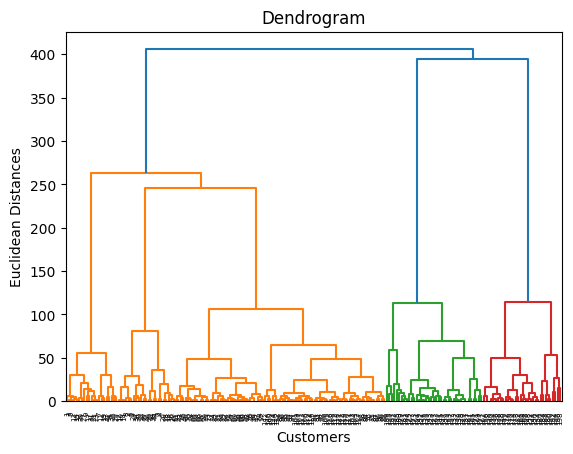

In [ ]:
# Membuat dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Menggunakan cluster = 5
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
ac.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
ac.labels_
# Cara lain untuk melihat hasil cluster
# y_pred = ac.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


Text(0, 0.5, 'Frekuensi')

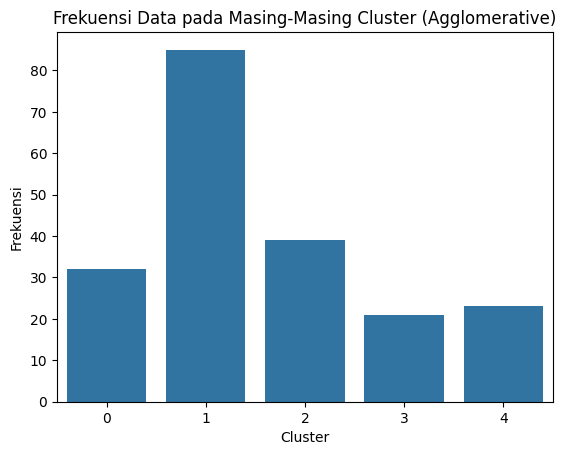

In [ ]:
# Nilai untuk sumbu X dan Y
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values
# Visualisasi
sns.barplot(x=cluster_x1, y=cluster_y1) # Pass x and y as keyword arguments.
plt.title("Frekuensi Data pada Masing-Masing Cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [ ]:
# Nilai fitur/variabel dari masing-masing cluster
ann_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 0]
spend_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 1]
ann_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 0]
spend_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 1]
ann_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 0]
spend_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 1]
ann_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 0]
spend_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 1]
ann_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 0]
spend_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 1]

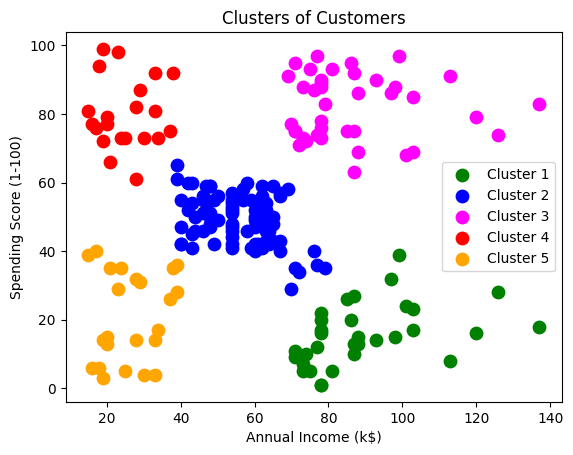

In [ ]:
# VISUALISASI HASIL CLUSTERING (AGGLOMERATIVE)
plt.scatter(ann_ac0, spend_ac0, s = 80, c = "green", label = "Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s = 80, c = "blue", label = "Cluster 2")
plt.scatter(ann_ac2, spend_ac2, s = 80, c = "magenta", label = "Cluster 3")
plt.scatter(ann_ac3, spend_ac3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_ac4, spend_ac4, s = 80, c = "orange", label = "Cluster 5")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [ ]:
# Memasukkan kembali "Customer ID"-nya
hasil_ac["CustomerID"] = dataset["CustomerID"]
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster,CustomerID
0,15,39,4,1
1,15,81,3,2
2,16,6,4,3
3,16,77,3,4
4,17,40,4,5


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate some sample data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=3)
predicted_labels = clustering.fit_predict(X)

# Evaluate clustering performance with Silhouette score
silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")



Silhouette Score: 0.8469881221532085
